<a href="https://colab.research.google.com/github/RudreshVeerkhare/Data_Science_Lab/blob/main/Video_Sales_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jiten Sidhpura (2018130051)

## Rudresh Veerkhare (2018130061)

## Title: Tutorial on Predicting Video Games Sales Prediction using Sklearn (Domain - Finance & Commerce)

The gaming industry is certainly one of the booming industries of the modern age, with market size valued at USD 151.06 billion in 2019 and is expected to grow at a Compound Annual Growth Rate (CAGR) of 12.9\% from 2020 to 2027. With the availability of technologies like AR/VR in consumer products like gaming consoles and even smartphones, the gaming sector shows great potential. There are various factors responsible for the success of any video game, but traditionally success is associated with sales of a particular video game. There is a tremendous amount of analytics data available in the gaming industry, and a great deal of value can be derived from it. To leverage this, data science is a powerful tool. So, the goal of this study is to analyse the data to predict the sales i.e the success of a given video game, which in turn will help video game companies to make informed decisions. We have performed a details analytical study of the data available, used various machine learning models like Linear Regression, Random Forest, XGBoost and CatBoost for modeling the data. Also to interpret the model predition we have analyzed the SHAP values. Finally we have achieved the best score root mean squared error of 1.65 by using CatBoost model.


## Problem Statement
**Domain: (Finance & Commerce)**  
Every company that develops any product or provides a service to users would want to know how profitable their business is in the market. A company can prevent a significant amount of losses if for any reason their expected sales turns out to be way below their profit margin. To mitigate this problem we are going to develop a machine learning model to predict the sales of a given video game on suitable features.


## Methodology  
We will be using the Python Programming Language and **Scikit Learn** module extensively for our study. We will be using the traditional **Linear Regression** model and with that tree based models such as **Random Forest, XGBoost, CatBoost**. We will use boxcox transformation to reduce skewness of features. Depending on the number of unique values of categorical variables we will either use LabelEncoder or OneHotEncoder  

**Model Evaluation**  
Since prediction of video game sales is a real and continuous value problem. Hence the nature of our machine learning problem is regression and to evaluate our models we would be using **Root Mean Square Error (RMSE)** as our evaluation metric. But we have calculated other metrics as well.

### Environment Setup

We have used stadard machine learning packages that are available to everyone in our study. We have used **pandas**, **numpy** for basic numerical and dataset manipulation operations. Visualization is important in data science and for that we have used **matplotlib** and **seaborn** modules. Lastly to train machine learning models we have use **sklearn**, **xgboost** and **catboost** python packages. For model predictions analysis we have used **SHAP** package to understand the features that impact our model. Most of the packages that we have mentioned are available by default in **goolge colab** and **kaggle** notebook enviroments by default. Packages such as SHAP, Catboost need to be installed manually using the standard **pip install** command.

### Install CatBoost Module 

In [ ]:
! pip install catboost

     |████████████████████████████████| 76.6 MB 51 kB/s 


### Install SHAP Package

In [ ]:
! pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


### Import Necessary Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools  
from matplotlib import pyplot
%matplotlib inline

import missingno
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor

import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from scipy.special import boxcox, inv_boxcox

### Configuring Seaborn to display larger plots 

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Import CatBoost Package 

In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv

### Reading Datasets

In [ ]:
!gdown --id "1ZGinSlz6VCZ03-JWBkXoN2GRhtTEGp7R" -O data.zip
!unzip data.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ZGinSlz6VCZ03-JWBkXoN2GRhtTEGp7R
To: /content/data.zip
100% 143k/143k [00:00<00:00, 74.6MB/s]
Archive:  data.zip
replace Data/Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Load Datasets

In [ ]:
train_file = pd.read_csv("/content/Data/Train.csv")
test_file = pd.read_csv("/content/Data/Test.csv")

In [ ]:
len(train_file)

3506

In [ ]:
len(test_file)

1503

### Describe Dataset 

In [ ]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


In [ ]:
train_file.describe()

,ID,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
count,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000
mean,2282.233600,2008.990302,3.790831,0.405824,2.171021
std,1287.273422,4.304252,3.141781,0.455541,2.495396
min,1.000000,1997.000000,0.568966,0.000341,0.001524
25%,1220.250000,2006.000000,1.738095,0.065966,0.965679
50%,2262.500000,2009.000000,2.766667,0.233333,1.866140
75%,3404.750000,2012.000000,4.621528,0.598333,2.792029
max,4523.000000,2019.000000,23.250000,2.325000,84.226041


In [ ]:
train_file.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


### Drop Duplicate Rows from the Dataset

In [ ]:
train_df = train_file.copy()

test_df = test_file.copy()

train_df = train_df.drop_duplicates()

### no of rows are same before and after hence there were no duplicate rows in this dataset
len(train_df)

3506

In [ ]:
train_df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


### Exploratory Data Analysis (EDA)

### Distribution plot of CRITICS_POINTS Feature

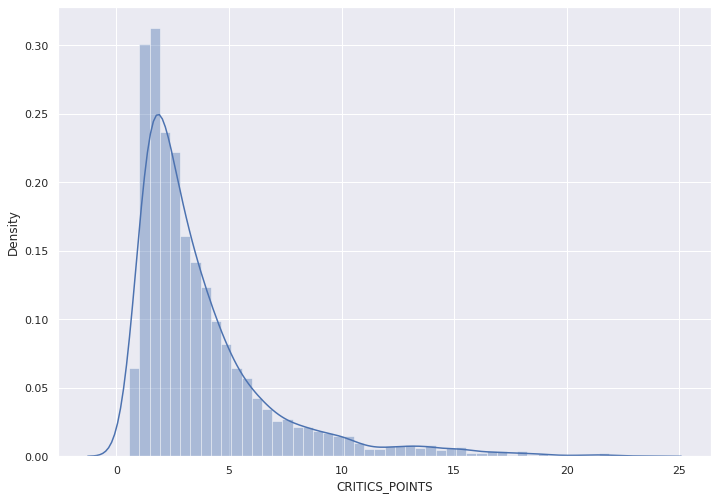

In [ ]:
sns.distplot(train_file.CRITICS_POINTS)

In [ ]:
test_df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333


In [ ]:
# get the minimum value of ID feature in train dataset
min(train_df.ID)

1

In [ ]:
# get the minimum value of ID feature in test dataset
min(test_df.ID)

0

### Combining Train and Test sets for EDA 

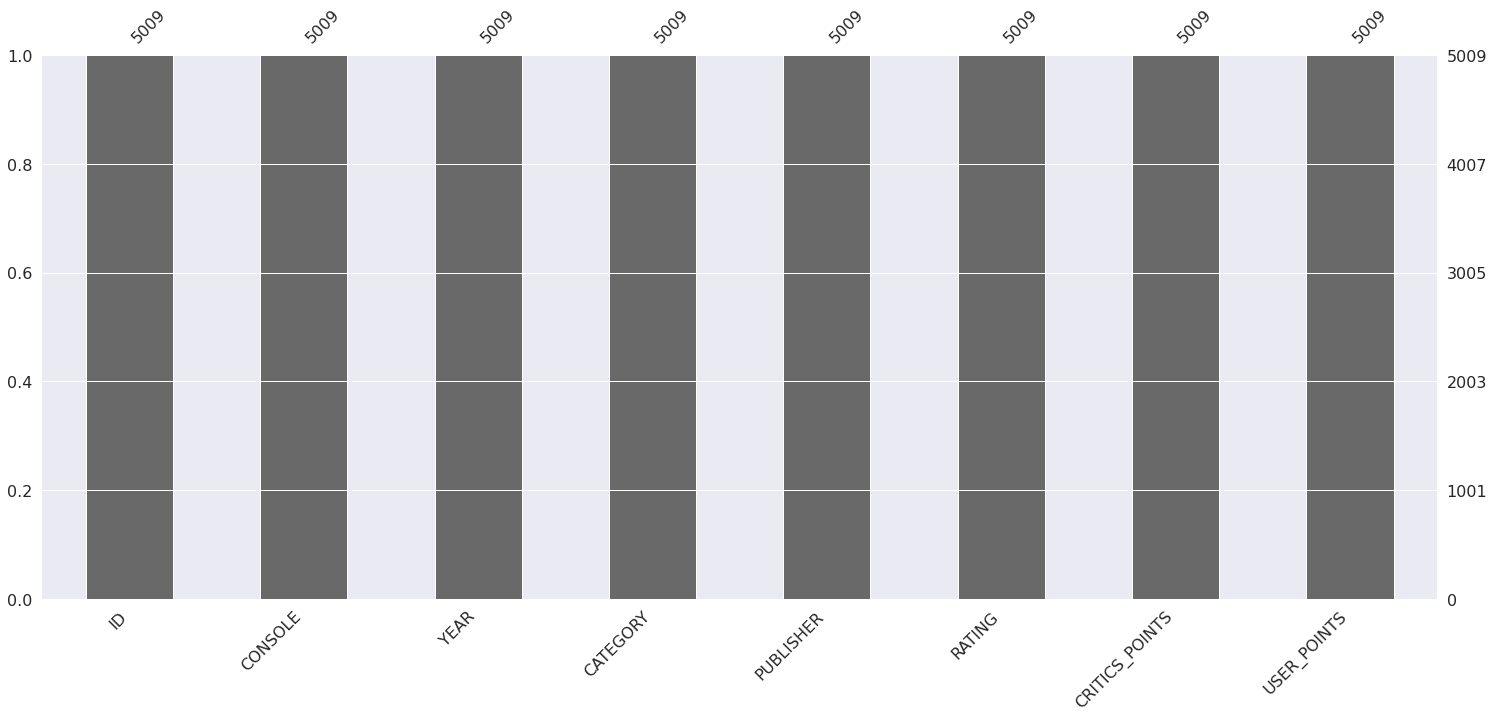

In [ ]:
combine = pd.concat([train_df.drop("SalesInMillions",axis = 1),test_df])

### check for missing values in the combined dataset
missingno.bar(combine)

In [ ]:
### find the skewness of all numerical features
combine.skew()

ID               -0.025973
YEAR              0.060762
CRITICS_POINTS    2.299211
USER_POINTS       1.607630
dtype: float64

In [ ]:
### find the skewness of all numerical features of the train dataset
train_df.skew()

ID                 -0.010779
YEAR                0.117732
CRITICS_POINTS      2.277228
USER_POINTS         1.590871
SalesInMillions    13.477527
dtype: float64

In [ ]:
### find the skewness of all numerical features of the test dataset
test_df.skew()

ID               -0.061603
YEAR             -0.058580
CRITICS_POINTS    2.334943
USER_POINTS       1.648389
dtype: float64

### Univartiate Analysis of Features 

### Output Variable

### SalesInMillions Feature is the output feature 

### Distribution Plot of the SalesInMillions feature

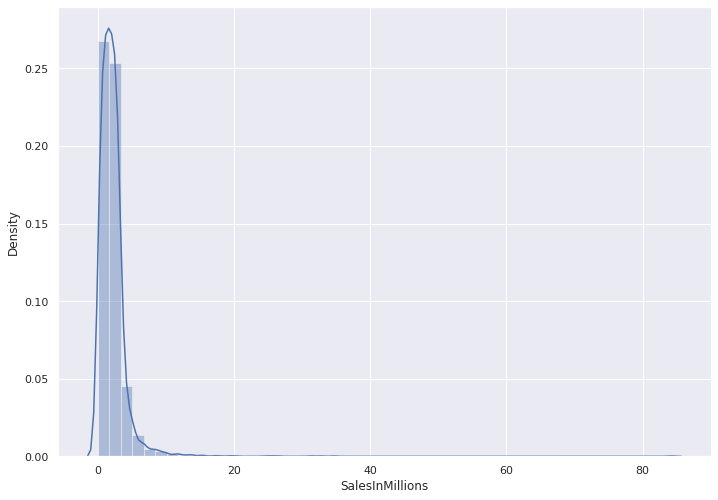

In [ ]:
sns.distplot(train_df.SalesInMillions)

### Function to apply boxcox transformation

In [ ]:
# this fucnction is used to reduce the skewness of the numerical features
def modify_a_col(col,x):
    ''''
    Function to transform a given feature with the help of boxcox transformation with given value x
    param col Series: Pandas Series Object (1 Column of the Dataset)
    param x int: Input value for the boxcox function
    ''' 

    # apply feature transformation with the help of boxcox
    col = boxcox(col, x)
    
    # print skewness after transformation
    print(col.skew())
    
    # make a distribution plot of the transformed feature
    sns.distplot(col)

### Reduced Skewness of Output Variable by applying boxcox transformation

-0.0009362893164548273


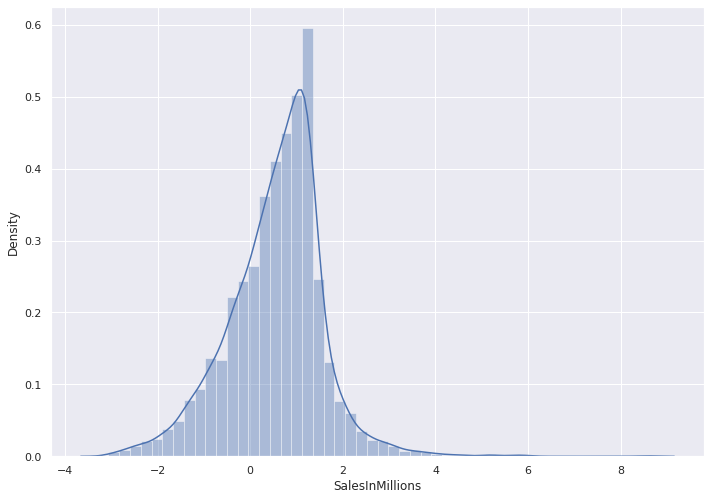

In [ ]:
# transform the output feature to reduce it's skewness
modify_a_col(train_df["SalesInMillions"], 0.27)

# transform the output feature to reduce it's skewness
train_df["SalesInMillions"] = boxcox(train_df["SalesInMillions"], 0.27)

In [ ]:
train_file['ID'].value_counts()

1287    6
2583    6
3950    6
1972    6
494     5
       ..
2614    1
3974    1
4372    1
579     1
3722    1
Name: ID, Length: 2654, dtype: int64

In [ ]:
test_file['ID'].value_counts()

3942    5
2065    4
1274    4
1982    4
4310    3
       ..
2641    1
3409    1
1524    1
3434    1
3174    1
Name: ID, Length: 1334, dtype: int64

### ID col cannot be ignored since it has repeated values 

In [ ]:
train_file.columns

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'],
      dtype='object')

### CONSOLE COLUMN

In [ ]:
### indicates that unique values of console are same in both the train and test dataset
if set(train_df.CONSOLE.unique()) == set(test_df.CONSOLE.unique()):
    
    print("All consoles are perfect !")


All consoles are perfect !


In [ ]:
print(set(train_df.CONSOLE))

{'ps4', 'dc', 'ds', 'ps3', 'xone', 'x360', 'gc', 'psp', 'pc', 'psv', 'gba', 'ps2', 'x', 'wiiu', 'wii', 'ps', '3ds'}


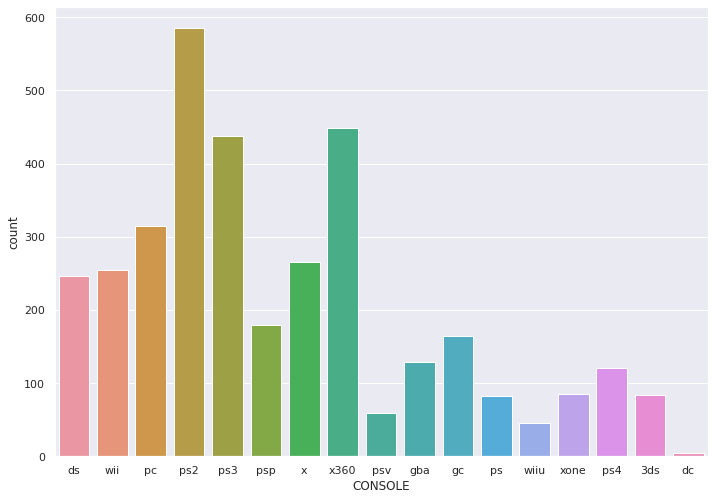

In [ ]:
# Countplot to see the frequency of each console in the train dataset
sns.countplot(train_df.CONSOLE)

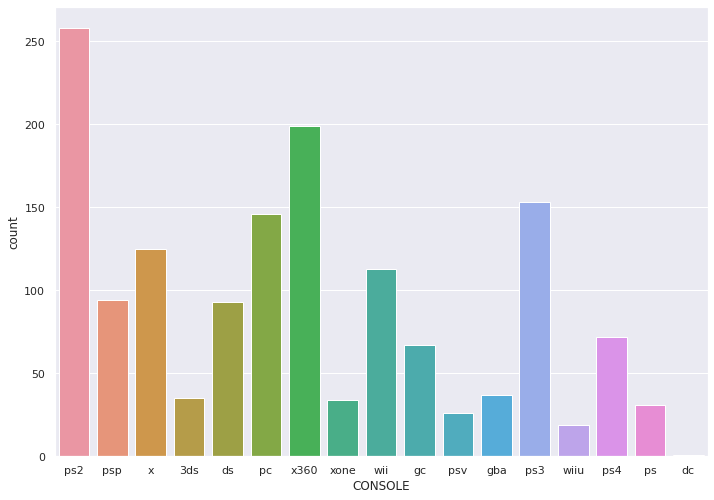

In [ ]:

# Countplot to see the frequency of each console in the test dataset
sns.countplot(test_df.CONSOLE)

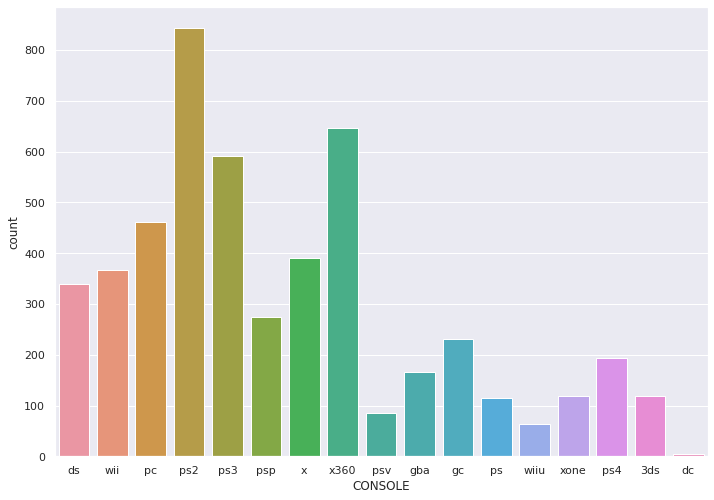

In [ ]:
# Countplot to see the frequency of each console in the combined dataset
sns.countplot(combine.CONSOLE)

In [ ]:
train_df.CONSOLE.value_counts()

ps2     585
x360    448
ps3     438
pc      315
x       266
wii     254
ds      246
psp     180
gc      164
gba     129
ps4     121
xone     85
3ds      84
ps       83
psv      59
wiiu     45
dc        4
Name: CONSOLE, dtype: int64

In [ ]:
test_df.CONSOLE.value_counts()

ps2     258
x360    199
ps3     153
pc      146
x       125
wii     113
psp      94
ds       93
ps4      72
gc       67
gba      37
3ds      35
xone     34
ps       31
psv      26
wiiu     19
dc        1
Name: CONSOLE, dtype: int64

In [ ]:
train_df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,0.623434
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,-1.257900
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,-0.576469
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,0.339633
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,-1.814317


### YEAR Column

In [ ]:
# print unique values of the Year column of the train dataset
x = train_df.YEAR.unique()
print(list(set(x)))

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [ ]:
# print unique values of the Year column of the test dataset
y = test_df.YEAR.unique()
print(list(set(y)))

[1988, 1994, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [ ]:
# indicates that unique values of year in train and test datasets are same
print(train_df.YEAR.unique().sort() == test_df.YEAR.unique().sort())

True


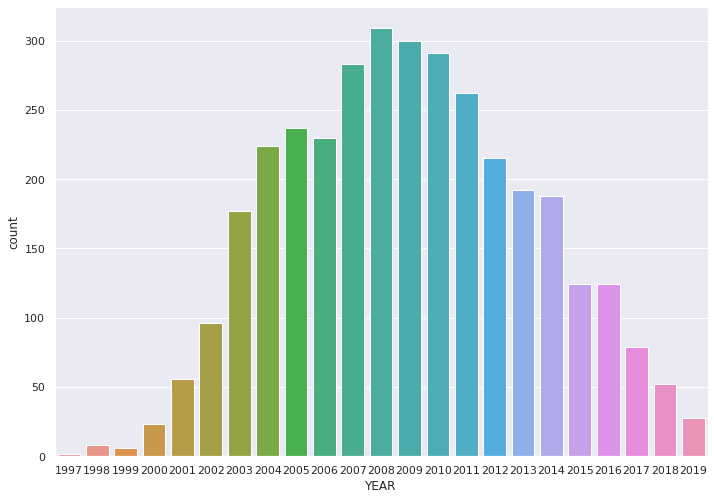

In [ ]:
sns.countplot(train_df.YEAR)

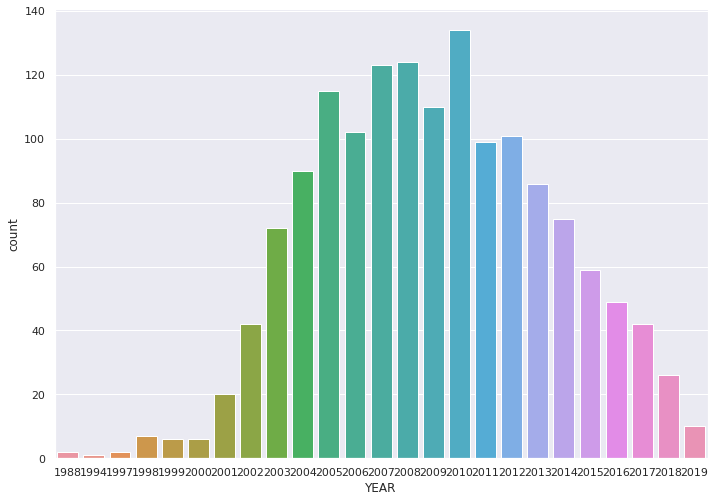

In [ ]:
sns.countplot(test_df.YEAR)

### No modifications were made to CATEGORY feature

In [ ]:
train_df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,0.623434
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,-1.257900
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,-0.576469
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,0.339633
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,-1.814317


In [ ]:
print(train_df.CATEGORY.unique().sort() == test_df.CATEGORY.unique().sort())

True


In [ ]:
len(set(train_df.CATEGORY))

12

In [ ]:
set(train_df.CATEGORY)

{'action',
 'adventure',
 'fighting',
 'misc',
 'platform',
 'puzzle',
 'racing',
 'role-playing',
 'shooter',
 'simulation',
 'sports',
 'strategy'}

### No modifications were made to PUBLISHER feature

In [ ]:
len(set(train_df.PUBLISHER))

204

In [ ]:
set(train_df.PUBLISHER)

{'1C Company',
 '3Do',
 '505 Games',
 '506 Games',
 '5P',
 'Acclaim Entertainment',
 'Acquire',
 'Activision',
 'Activision Blizzard',
 'Agatsuma Entertainment',
 'Agetec',
 'Aksys Games',
 'Aq Interactive',
 'Aqua Plus',
 'Arc System Works',
 'Ascaron Entertainment Gmbh',
 'Ascii Entertainment',
 'Aspyr',
 'Atari',
 'Atlus',
 'Avalon Interactive',
 'Bam! Entertainment',
 'Banpresto',
 'Bethesda Softworks',
 'Bigben Interactive',
 'Bitcomposer Games',
 'Black Bean Games',
 'Black Label Games',
 'Blue Byte',
 'Capcom',
 'Cave',
 'Cdv Software Entertainment',
 'City Interactive',
 'Cloud Imperium Games Corporation',
 'Codemasters',
 'Compile Heart',
 'Crave Entertainment',
 'Crimson Cow',
 'D3Publisher',
 'Deep Silver',
 'Destination Software, Inc',
 'Destineer',
 'Devolver Digital',
 'Disney Interactive Studios',
 'Dreamcatcher Interactive',
 'Dtp Entertainment',
 'Dusenberry Martin Racing',
 'Ea Games',
 'Eidos Interactive',
 'Electronic Arts',
 'Empire Interactive',
 'En Masse Enterta

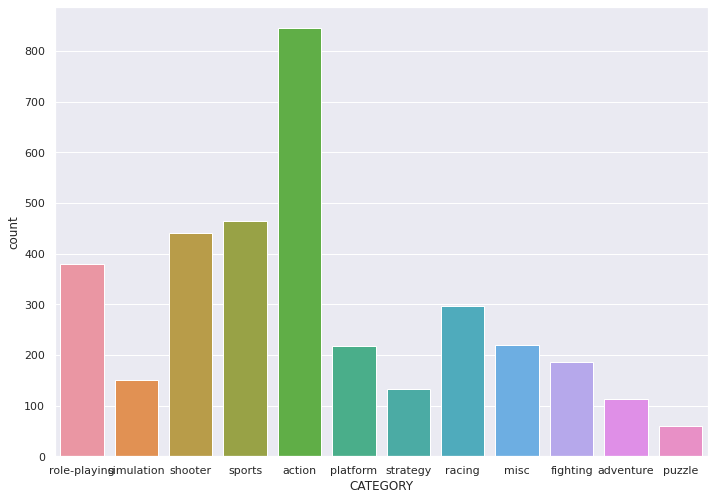

In [ ]:
sns.countplot(train_df.CATEGORY)

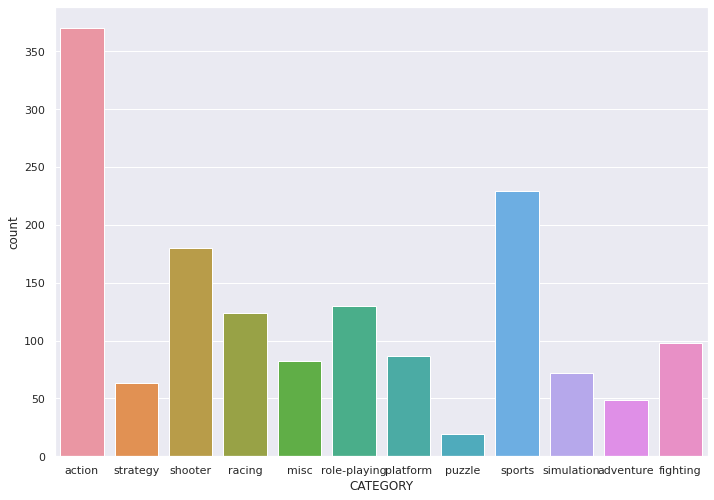

In [ ]:
sns.countplot(test_df.CATEGORY)

In [ ]:
train_df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,0.623434
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,-1.257900
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,-0.576469
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,0.339633
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,-1.814317


### Both train and test sets contain same PUBLISHER values

In [ ]:
if set(train_df.PUBLISHER.sort_values() == set(test_df.PUBLISHER.sort_values())):
    
    print(True)

True


In [ ]:
len(set(train_df.PUBLISHER.sort_values()))

204

### RATING COLUMN 

some values present in train set which were absent in test set and hence they were dropped 

In [ ]:
set(train_df.RATING.sort_values())

{'E', 'E10+', 'K-A', 'M', 'RP', 'T'}

In [ ]:
set(test_df.RATING.sort_values())

{'AO', 'E', 'E10+', 'M', 'T'}

### Removing rows with "K-A" and "RP"

In [ ]:
train_df[train_df.RATING == "K-A"]

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
286,2771,ps,1998,misc,Sony Computer Entertainment,K-A,6.133333,0.154167,-0.147765


In [ ]:
train_df[train_df.RATING == 'RP']

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
374,3696,pc,2011,strategy,Paradox Interactive,RP,5.25,0.251852,1.121748
748,591,pc,2016,strategy,Gaslamp Games,RP,7.25,0.760000,-0.849052


In [ ]:
test_df[test_df.RATING == "AO"]

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
623,1543,x,2008,action,Take-Two Interactive,AO,1.603448,0.073109


In [ ]:
train_df = train_df[(train_df.RATING != "RP") & (train_df.RATING != "K-A")]

In [ ]:
set(train_df.RATING.sort_values())

{'E', 'E10+', 'M', 'T'}

In [ ]:
train_df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,0.623434
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,-1.257900
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,-0.576469
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,0.339633
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,-1.814317


In [ ]:
combine.skew()

ID               -0.025973
YEAR              0.060762
CRITICS_POINTS    2.299211
USER_POINTS       1.607630
dtype: float64

### Reduced skewness of  CRITICS POINTS by applying boxcox transformation

0.030325075809584566


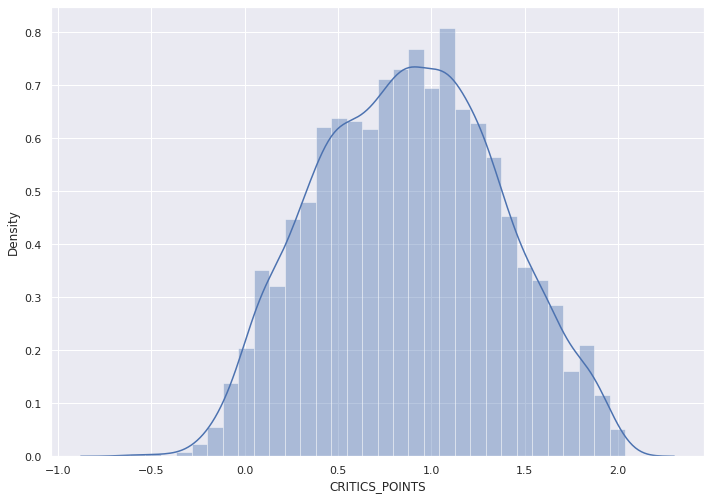

In [ ]:
modify_a_col(combine.CRITICS_POINTS,-0.3)

train_df["CRITICS_POINTS"] = boxcox(train_df["CRITICS_POINTS"], -0.3)

test_df["CRITICS_POINTS"] = boxcox(test_df["CRITICS_POINTS"], -0.3)

### Reduced skewness of  USER POINTS by applying boxcox transformation

0.024270050203996835


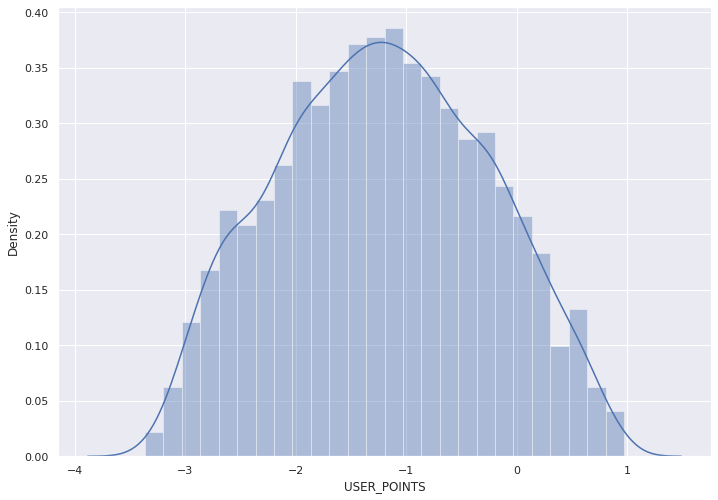

In [ ]:
modify_a_col(combine.USER_POINTS, 0.26)

train_df["USER_POINTS"] = boxcox(train_df["USER_POINTS"], 0.26)

test_df["USER_POINTS"] = boxcox(test_df["USER_POINTS"], 0.26)

In [ ]:
train_df.RATING.unique()

array(['E', 'E10+', 'M', 'T'], dtype=object)

In [ ]:
train_df.skew()

ID                -0.010394
YEAR               0.121266
CRITICS_POINTS     0.018155
USER_POINTS        0.018782
SalesInMillions   -0.001442
dtype: float64

In [ ]:
print(test_df.CONSOLE.unique())

['ps2' 'psp' 'x' '3ds' 'ds' 'pc' 'x360' 'xone' 'wii' 'gc' 'psv' 'gba'
 'ps3' 'wiiu' 'ps4' 'ps' 'dc']


In [ ]:
len(train_df.CONSOLE.unique())

17

In [ ]:
print(train_df.CONSOLE.unique())

['ds' 'wii' 'pc' 'ps2' 'ps3' 'psp' 'x' 'x360' 'psv' 'gba' 'gc' 'ps' 'wiiu'
 'xone' 'ps4' '3ds' 'dc']


In [ ]:
console_dict = {
    
    "x" : "x-type",
    "xone" : "x-type",
    "x360" : "x-type",
    "psp" : "p-type",
    "ps2" : "p-type",
    "ps3" : "p-type",
    "ps4" : "p-type",
    "ps"  : "p-type",
    "psv" : "p-type",
    "pc" : "pc",
    "wii" : "w-type",
    "wiiu" : "w-type",
    "ds"  : "d-type",
    "3ds" : "d-type",
    "dc" : "d-type",
    "gba" : "g-type",
    "gc" : "g-type",
}

print(len(console_dict.keys()))

print(set(console_dict.keys()) == set(train_df.CONSOLE.unique()))

17
True


In [ ]:
def move_target_to_last(dataset, col_name):
    
    x = dataset[col_name]
    
    dataset = dataset.drop(col_name, axis = 1)
    
    dataset[col_name] = x
    
    return dataset

In [ ]:
train_df = move_target_to_last(train_df, "SalesInMillions")

In [ ]:
train_df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,0.894459,-1.024760,0.623434
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,1.796218,0.527919,-1.257900
2,495,pc,2019,shooter,Activision,M,1.219271,-2.811454,-0.576469
3,2641,ps2,2002,sports,Electronic Arts,E,1.163286,-0.970196,0.339633
4,811,ps3,2013,action,Activision,M,0.723042,-2.267121,-1.814317


In [ ]:
test_df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,4310,ps2,2008,action,Tecmo Koei,T,1.122234,-0.664144
1,4011,psp,2007,strategy,Atari,E10+,1.338705,-1.907006
2,2185,ps2,2004,shooter,Electronic Arts,T,0.944129,-1.979223
3,1644,x,2006,action,Electronic Arts,E,0.914674,-0.125732
4,188,3ds,2011,racing,Ubisoft,E10+,0.146945,-1.371757


In [ ]:
train_df.corr()

,ID,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
ID,1.000000,-0.052969,0.007047,0.061334,-0.032628
YEAR,-0.052969,1.000000,-0.181344,-0.415385,0.004861
CRITICS_POINTS,0.007047,-0.181344,1.000000,0.521520,-0.119885
USER_POINTS,0.061334,-0.415385,0.521520,1.000000,-0.205847
SalesInMillions,-0.032628,0.004861,-0.119885,-0.205847,1.000000


In [ ]:
new_train = train_df.copy()

new_test = test_df.copy()

new_train = new_train.drop("CRITICS_POINTS",axis = 1)

new_test = new_test.drop("CRITICS_POINTS", axis = 1)

In [ ]:
train_df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,0.894459,-1.024760,0.623434
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,1.796218,0.527919,-1.257900
2,495,pc,2019,shooter,Activision,M,1.219271,-2.811454,-0.576469
3,2641,ps2,2002,sports,Electronic Arts,E,1.163286,-0.970196,0.339633
4,811,ps3,2013,action,Activision,M,0.723042,-2.267121,-1.814317


### Why we used Custom Metric ?

As discussed before, since our output variable SalesInMillions is highly skewed we have used boxcox transformation to reduce it's skewness. Now when we compute predictions and check their evaluation score then it would be in terms of the transformed output variable. But that is not we are looking for, we want to tell model to reduce the errors in making predictions in the original form of the output variable. Hence we designed a custom metric that will perform inverse transformation of the model outputs and return the evaluation score.

In [ ]:
class CustomMetric(object):
    
    def get_final_error(self, error, weight):
        return np.sqrt(boxcox(error,0.27) / (weight + 1e-38))

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += inv_boxcox(w,0.27) * ((inv_boxcox(approx[i],0.27) - inv_boxcox(target[i],0.27))**2)

        return error_sum, weight_sum

### Spliting  Data into Training and Validation Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(["SalesInMillions"],axis = 1), train_df["SalesInMillions"], test_size = 0.2,random_state=8)

In [ ]:
cat_columns=train_df.select_dtypes(include=['object','category']).columns.tolist()

cat_columns

['CONSOLE', 'CATEGORY', 'PUBLISHER', 'RATING']

### Why CatBoost was used ?

Catboost is a gradient-boosting tree-based model with out of box support for categorical features. Because of this, there is no need to perform any preprocessing on categorical features. The algorithm converts the categorical features into numerical values with the help of target statistics. It handles categorical data by computing target statistics of the features from it's target feature.

Designed by a Russian company Yandex and has applications in the fields of self-driving cars, weather prediction, and
more. The CatBoost algorithm has performed better than other state-of-the-art
gradient boosting algorithms such as XGBoost, LightGBM on Epsilon, Amazon,
and other standard machine learning datasets.

[Official Documentation](https://catboost.ai/)

[Video Explaination](https://www.youtube.com/watch?v=8o0e-r0B5xQ)

### Model Training

In [ ]:
model = CatBoostRegressor(use_best_model=True,learning_rate=0.01,n_estimators=10000,
                          objective="RMSE",cat_features=cat_columns,
                          eval_metric=CustomMetric())

In [ ]:
model.fit(X=X_train,y=y_train,eval_set=(X_test,y_test),plot=False)

Streaming output truncated to the last 5000 lines.
5005:	learn: 0.1255621	test: 0.2157607	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 24s
5006:	learn: 0.1255603	test: 0.2157610	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 23s
5007:	learn: 0.1255441	test: 0.2157578	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 23s
5008:	learn: 0.1255416	test: 0.2157534	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 23s
5009:	learn: 0.1255410	test: 0.2157534	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 23s
5010:	learn: 0.1255406	test: 0.2157536	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 23s
5011:	learn: 0.1254910	test: 0.2157660	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 23s
5012:	learn: 0.1254913	test: 0.2157643	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 23s
5013:	learn: 0.1254897	test: 0.2157648	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 23s
5014:	learn: 0.1254880	test: 0.2157646	best: 0.2157478 (4967)	total: 2m 24s	remaining: 2m 23s
5015:	lea

In [ ]:
train_df.columns

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'],
      dtype='object')

In [ ]:
model.feature_importances_

array([10.27578365, 14.40183964,  7.42141352, 12.95199593, 16.55124033,
       10.32352161,  9.81283567, 18.26136966])

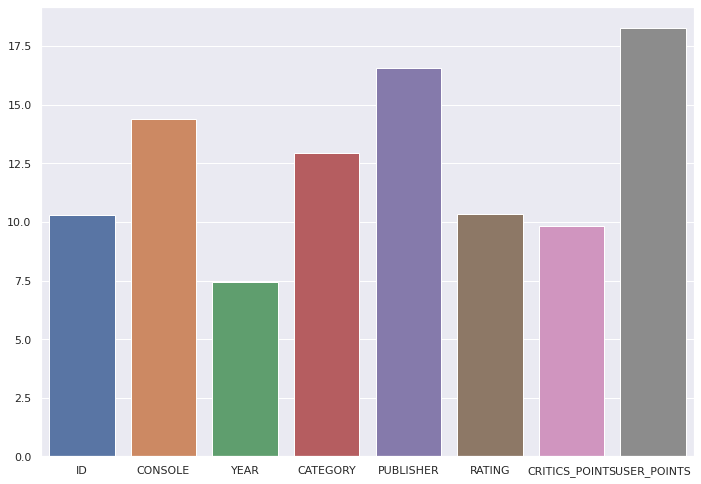

In [ ]:
sns.barplot(x=train_df.columns[:-1], y = model.feature_importances_)

In [ ]:
model.get_best_score()

{'learn': {'CustomMetric': 0.11445218190907411, 'RMSE': 0.4763013885244002},
 'validation': {'CustomMetric': 0.21546861513675475,
  'RMSE': 0.941033398849278}}

In [ ]:
model.best_iteration_

9170

In [ ]:
pred = model.predict(X_test)

print("RMSE ERROR == ",np.sqrt(mean_squared_error(inv_boxcox(y_test, 0.27), inv_boxcox(pred, 0.27))))

RMSE ERROR ==  1.6575377852177011


In [ ]:
original_y_test = inv_boxcox(y_test, 0.27)
original_pred = inv_boxcox(pred, 0.27)

### Regression Metrics Computation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
def get_regression_eval_metrics(y_test, predictions):
    scores = pd.DataFrame()

    scores['MSE'] = pd.Series(mean_squared_error(y_test, predictions))
    scores['RMSE'] = pd.Series(np.sqrt(scores['MSE']))
    scores['R2'] = pd.Series(r2_score(y_test, predictions))
    
    return scores

### CatBoost Eval Metrics

In [ ]:
catboost_scores = get_regression_eval_metrics(original_y_test, original_pred)
catboost_scores.head()

,MSE,RMSE,R2
0,2.747432,1.657538,0.413889


In [ ]:
numerical_x_train = X_train.copy()
numerical_x_test = X_test.copy()

### Converting all Data to Numeric for XGBoost, RandomForest

In [ ]:
for col in cat_columns:
    label_encoder = LabelEncoder()
    numerical_x_train[col] = label_encoder.fit_transform(numerical_x_train[col])
    numerical_x_test[col] = label_encoder.fit_transform(numerical_x_test[col])

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(numerical_x_train, y_train)

In [ ]:
linear_model_preds = inv_boxcox(linear_model.predict(numerical_x_test), 0.27)

linear_model_scores = get_regression_eval_metrics(original_y_test, linear_model_preds)

linear_model_scores.head()

,MSE,RMSE,R2
0,4.510268,2.123739,0.037822


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

random_forest.fit(numerical_x_train, y_train)

RandomForestRegressor()

In [ ]:
random_forest_preds = inv_boxcox(random_forest.predict(numerical_x_test), 0.27)

random_forest_scores = get_regression_eval_metrics(original_y_test, random_forest_preds)
random_forest_scores.head()

,MSE,RMSE,R2
0,3.273854,1.80938,0.301587


### XGBOOST MODEL

In [ ]:
import xgboost
xgb_model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators = 1000, seed = 123)
xgb_model.fit(numerical_x_train, y_train, eval_set=[(numerical_x_test, y_test)], early_stopping_rounds=50)

[0]	validation_0-rmse:1.03147
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1.02143
[2]	validation_0-rmse:1.01349
[3]	validation_0-rmse:1.0065
[4]	validation_0-rmse:1.00136
[5]	validation_0-rmse:0.998466
[6]	validation_0-rmse:0.992799
[7]	validation_0-rmse:0.989647
[8]	validation_0-rmse:0.98579
[9]	validation_0-rmse:0.983363
[10]	validation_0-rmse:0.981161
[11]	validation_0-rmse:0.978844
[12]	validation_0-rmse:0.977862
[13]	validation_0-rmse:0.976122
[14]	validation_0-rmse:0.974109
[15]	validation_0-rmse:0.973331
[16]	validation_0-rmse:0.972076
[17]	validation_0-rmse:0.970046
[18]	validation_0-rmse:0.969891
[19]	validation_0-rmse:0.969779
[20]	validation_0-rmse:0.968224
[21]	validation_0-rmse:0.968607
[22]	validation_0-rmse:0.967989
[23]	validation_0-rmse:0.967773
[24]	validation_0-rmse:0.967454
[25]	validation_0-rmse:0.967038
[26]	validation_0-rmse:0.966897
[27]	validation_0-rmse:0.966738
[28]	validation_0-rmse:0.967464
[29]	validation_0-rmse:0

XGBRegressor(n_estimators=1000, objective='reg:squarederror', seed=123)

### XGBOOST PREDICTIONS

In [ ]:
xgboost_preds = inv_boxcox(xgb_model.predict(numerical_x_test), 0.27)

xgboost_scores = get_regression_eval_metrics(original_y_test, xgboost_preds)

xgboost_scores.head()

,MSE,RMSE,R2
0,3.36053,1.833175,0.283096


### Combining Results

In [ ]:
catboost_scores.head()

,MSE,RMSE,R2
0,2.747432,1.657538,0.413889


In [ ]:
random_forest_scores.head()

,MSE,RMSE,R2
0,3.273854,1.80938,0.301587


In [ ]:
linear_model_scores.head()

,MSE,RMSE,R2
0,4.510268,2.123739,0.037822


In [ ]:
xgboost_scores.head()

,MSE,RMSE,R2
0,3.36053,1.833175,0.283096


In [ ]:
final_results = pd.DataFrame(columns=catboost_scores.columns)
final_results.loc[0] = catboost_scores.iloc[0].values
final_results.loc[1] = xgboost_scores.iloc[0].values
final_results.loc[2] = random_forest_scores.iloc[0].values
final_results.loc[3] = linear_model_scores.iloc[0].values

final_results.insert(0, 'Model', ['Catboost', 'XGBoost', 'Random Forest', 'Linear Regression'])

final_results.head()

,Model,MSE,RMSE,R2
0,Catboost,2.747432,1.657538,0.413889
1,XGBoost,3.360530,1.833175,0.283096
2,Random Forest,3.273854,1.809380,0.301587
3,Linear Regression,4.510268,2.123739,0.037822


In [ ]:
final_results

,Model,MSE,RMSE,R2
0,Catboost,2.747432,1.657538,0.413889
1,XGBoost,3.360530,1.833175,0.283096
2,Random Forest,3.273854,1.809380,0.301587
3,Linear Regression,4.510268,2.123739,0.037822


### From above table it can be seen that catboost has given the best performance. 

Because catboost gave best performance, we decided to use it for model prediction analysis that is shown in the next section

### Model Prediction Analysis

Today machine learning plays a very critical role in many indudstries.
In any business, the reason for prediction by a model is equally important as the model predicting accurately. The Sales Department of the
companies can take appropriate policies or decisions if they know how features of the game affect it sales. 

For this, we have computed SHAP (Shapley Additive Expla-
nations) values of the CatBoost model.
SHAP values are used to explain why a model has predicted for the
given sample of features in a certain way. Popular profession networking website LinkedIn also uses this SHAP Analysis to improve it's machine learning algorithms performance.

In [ ]:
import shap
shap.initjs()

### Shap Tree Explainer

Uses Tree SHAP algorithms to explain the output of ensemble tree models.

Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees, under several different possible assumptions about feature dependence. It depends on fast C++ implementations either inside an externel model package or in the local compiled C extention.

### Computing Shap values of the validation dataset

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [ ]:
X_test

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
971,4104,ps3,2008,sports,Activision,T,0.637006,-0.894854
2006,497,wii,2013,shooter,Activision,M,1.192488,-2.926578
2435,2260,3ds,2019,action,Nintendo,T,0.130892,-2.414973
1942,3022,x,2006,shooter,Thq,M,1.082112,-0.589618
2220,2113,psp,2007,action,Take-Two Interactive,M,1.224456,-1.272862
...,...,...,...,...,...,...,...,...
1189,4372,ps4,2016,shooter,Bethesda Softworks,M,0.078060,-2.779475
2379,1776,ps3,2013,fighting,Warner Bros. Interactive Entertainment,T,0.668249,-2.329295
776,262,x,2006,action,Electronic Arts,T,0.145753,-0.944960
2027,494,x360,2015,shooter,Activision,M,0.806356,-3.172900


### Label Encoding Categorical Data for Shap Summary Plots 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

shaped_X_test = X_test.copy()

mapping_dict_list = dict()

for col in cat_columns:
    shaped_X_test[col] = label_encoder.fit_transform(shaped_X_test[col])
    mapping_dict_list[col] = (dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
   


### Printing Mapping for Later Use

In [ ]:
mapping_dict_list['CONSOLE']

{'3ds': 0,
 'ds': 1,
 'gba': 2,
 'gc': 3,
 'pc': 4,
 'ps': 5,
 'ps2': 6,
 'ps3': 7,
 'ps4': 8,
 'psp': 9,
 'psv': 10,
 'wii': 11,
 'wiiu': 12,
 'x': 13,
 'x360': 14,
 'xone': 15}

In [ ]:
mapping_dict_list['RATING']

{'E': 0, 'E10+': 1, 'M': 2, 'T': 3}

In [ ]:
mapping_dict_list['PUBLISHER']

{'1C Company': 0,
 '3Do': 1,
 '505 Games': 2,
 'Acclaim Entertainment': 3,
 'Activision': 4,
 'Agatsuma Entertainment': 5,
 'Agetec': 6,
 'Arc System Works': 7,
 'Aspyr': 8,
 'Atari': 9,
 'Atlus': 10,
 'Bam! Entertainment': 11,
 'Bethesda Softworks': 12,
 'Capcom': 13,
 'City Interactive': 14,
 'Cloud Imperium Games Corporation': 15,
 'Codemasters': 16,
 'Crave Entertainment': 17,
 'Crimson Cow': 18,
 'D3Publisher': 19,
 'Deep Silver': 20,
 'Destineer': 21,
 'Disney Interactive Studios': 22,
 'Dusenberry Martin Racing': 23,
 'Eidos Interactive': 24,
 'Electronic Arts': 25,
 'Enix Corporation': 26,
 'Focus Home Interactive': 27,
 'Gamebridge': 28,
 'Ghostlight': 29,
 'Global Star': 30,
 'Gungho': 31,
 'Hip Interactive': 32,
 'Idea Factory': 33,
 'Ignition Entertainment': 34,
 'Indie Games': 35,
 'Infogrames': 36,
 'Interplay': 37,
 'Jowood Productions': 38,
 'Kalypso Media': 39,
 'Koch Media': 40,
 'Konami Digital Entertainment': 41,
 'Lucasarts': 42,
 'Mad Catz': 43,
 'Majesco Entertai

In [ ]:
mapping_dict_list['CATEGORY']

{'action': 0,
 'adventure': 1,
 'fighting': 2,
 'misc': 3,
 'platform': 4,
 'puzzle': 5,
 'racing': 6,
 'role-playing': 7,
 'shooter': 8,
 'simulation': 9,
 'sports': 10,
 'strategy': 11}

### Summarizing Validation Dataset by SHAP Analysis

In [ ]:
X_test.YEAR

971     2008
2006    2013
2435    2019
1942    2006
2220    2007
        ... 
1189    2016
2379    2013
776     2006
2027    2015
3052    2003
Name: YEAR, Length: 701, dtype: int64

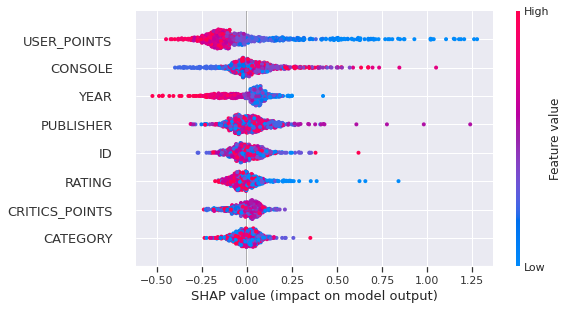

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, shaped_X_test)

### Explaination of the Summary Plot

From the above plot, we can conclude that user points is the most important feature and category is the least important feature while making prediction. Because shap summary plot by default sorts the features in descending order of importances. 

It can be seen that as USER_POINTS increase it decreases the model's predicition score. 

In case of CONSOLE feature we can see that consoles (x360 = 14) and (xone = 15) have comparatively higher sales than console (3ds = 0) and (ds = 1).

In case of YEAR feature, it can be easily seen that as year increases sales in general decreases.

For Publishers such as (Zoo Digital Publishing = 93) and (Zoo Games = 94) their sales are very high as shown by few red dots at the extreme right.

Features such as RATING, CRITIC_POINTS, and CATEGORY have majority of their plots placed at center only and thus they do not have a specific relationship with target feature. Density of red (high) and blue (low) points is approximately the same.

### Plotting the Features Impacting the Predcition for the 1st Sample of Validation Dataset

In [ ]:
shap.initjs()

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], )

### Explaination for Prediction for 1st Sample of Test Dataset

Sometimes we may be interested to know how our model is performing for individual cases. We can also analyze the model prediction using SHAP values. Above we have considered one example from the test dataset. From the graph it can be easily concluded that features such as YEAR, ID, CRITIC_POINTS, RATING caused model output to increase whereas features such as USER_POINTS, CATEGORY have made the model output to decrease.

### Conclusion

Sales Prediction of a product is very crucial for game development companies because it can help them make better decisons based on features gathered from the end users and the market. 

Our machine learning solution can help such companies to predict their sales and help them compare their projected values with the model's predictions. By performing Exploratory Data Analysis (EDA), we transformed few features to a new format so their skewness is reduced. We used **Catboost** model, a special algorithm that takes care of the categorical data processing by itself and it tends to give better performances over other models that apply labelencoding and one hot encoding. Among **Catboost**, **XGBoost**, **Random Forest** and **Linear Regression** the catboost model was the best performer. 

These companies generally need models that can also justify their predictions so that they can no where to improve. Hence, model should not only be robust with great accuracy but we should be able to justify it's prediction. Hence to achieve this we have used *SHAP* analysis to perform our model's predicition analysis.

Our model gave a **RMSE** score of **1.65**